# Pathway loading in Cytoscape

We wish to create an automated Cytoscape workflow using Python and py4cytoscape in Jupyter notebooks

In order to load our pathway from WikiPathways into Cytoscape, we have a select few prerequisites:

- Downloading and starting a **new** Cytoscape session
- Installing the latest versions of Wikipathways, CyTargetLinker and FileTransfer. 

This can be done via Cytoscape itself by opening Apps > App Manager > Searching for required apps.
- Downloading py4cytoscape

Next, we import the following packages:

In [1]:
import os
import sys
import requests
import pandas as pd
from lxml import etree as ET
from collections import OrderedDict
import py4cytoscape as p4c
pd.set_option('display.float_format', '{:.6g}'.format)

import warnings
warnings.filterwarnings('ignore')


# Logging Errors

To prevent logging errors from occuring, we run this piece of code. The logfile directory will change depending on where your log file is saved on your PC.

In [33]:
from logging import getLogger, INFO
from concurrent_log_handler import ConcurrentRotatingFileHandler
import os

log = getLogger()
# Use an absolute path to prevent file rotation trouble.
logfile = os.path.abspath("C:/Users/Aria Jadhav/Documents/GitHub/2021-internship/Aria-Notebooks/logs/py4cytoscape")
# Rotate log after reaching 512K, keep 5 old copies.
rotateHandler = ConcurrentRotatingFileHandler(logfile, "a", 512*1024, 5)
log.addHandler(rotateHandler)
log.setLevel(INFO)

log.info("Here is a very exciting log message, just for you")

## Defining Pathway

Once we have imported the following packages, we can make a variable to which we assign the ID of the pathway we wish to visualise in cytoscape. 

In this case, I have assigned WP5035 from WikiPathways to the variable 'WP'

In [3]:
WP = 'WP5035'

## Loading Pathway in Cytoscape

We now will load the pathway assigned to variable 'WP' in cytoscape by running the following piece of code.

In the variable cmd_list we recall all the commands we wish to run in a systematic way. 

Since we wish to load our pathway as a network, we use the command 'import-as-network'. However, if you wish to import it as a pathway, simply replace it to 'import-as-pathway'


In [4]:
cmd_list = ['wikipathways','import-as-network','id=" ', WP, '"']
cmd = " ".join(cmd_list)
p4c.commands.commands_get(cmd)

[]

## Visualising network in Jupyter Notebook

In order to visualize the output that you get in Cytoscape in the notebook, we need to import IPython and export our network as an image.

This file already exists. A Cytoscape popup will be generated to confirm overwrite.


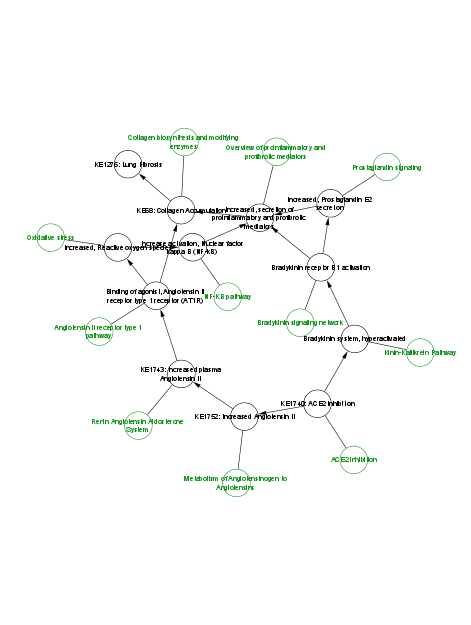

In [7]:
import IPython
p4c.export_image(filename='pathway.png')
p4c.sandbox_get_from('pathway.png')
from IPython.display import Image
Image('pathway.png')

## Network extension

Before we begin to extend our network using the linkset and CyTargetLinker, we have to identify the path where we have stored it. Ensure that all files needed for the visualisation and analysis are present in the folder.

In [8]:
path = 'C:/Users/Aria Jadhav/Documents/GitHub/2021-internship/Aria-Notebooks/'

linkset = path + 'wikipathways-hsa-20210512-REACTOME.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 2',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 85',
 'Added nodes: 85']

In [9]:
linkset = path + 'wikipathways-hsa-20210512-WIKIPATHWAYS.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 3',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 125',
 'Added nodes: 109']

In [10]:
linkset = path + 'wikipathways-hsa-20210525-STUDENT.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 4',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 194',
 'Added nodes: 157']

We can visualize our Cytoscape output by running the same piece of code as before and changing the file name

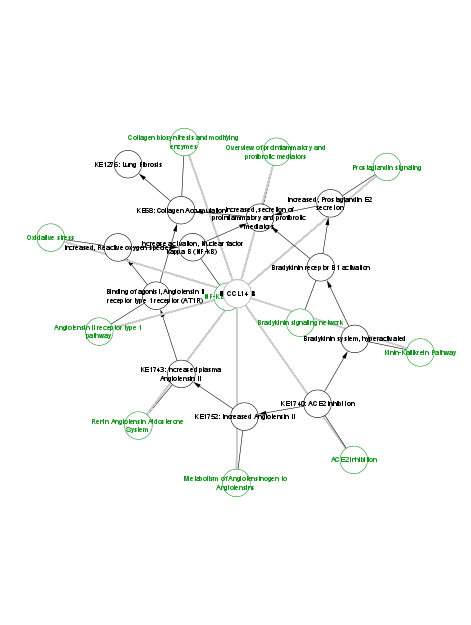

In [11]:
p4c.export_image(filename='extended_network.png')
p4c.sandbox_get_from('extended_network.png')
from IPython.display import Image
Image('extended_network.png')

## Loading and Applying Visual Style

To improve the readability of the nodes in the network, we can load a visual style file saved in the path as mentioned before.

In [12]:
vizstyle = path+ "newstyleV1.xml"
LoadStylecmd = "".join(['vizmap load file file="',vizstyle,'"'])
p4c.commands.commands_get(LoadStylecmd)

['Loaded styles:', 'CyTargetLinker']

 Next, we can apply this style using the following piece of code

In [13]:
setVisualStyle = 'vizmap apply styles="CyTargetLinker"'
p4c.commands.commands_get(setVisualStyle)

['Style applied to views:',
 'CTL_ACE2 inhibition leads to pulmonary fibrosis - Homo sapiens_1 (SUID: 532)']

In [14]:
p4c.layout_network()

{}

We get the following output after applying the visual style

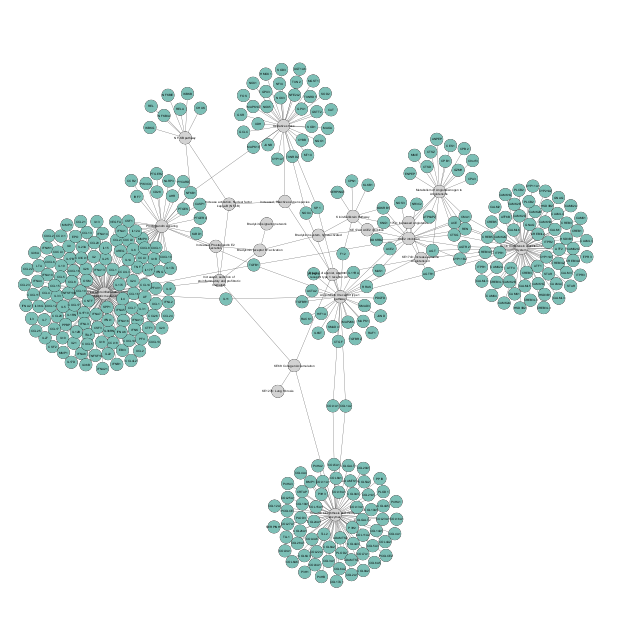

In [15]:
p4c.export_image(filename='extended_net_viz.png')
p4c.sandbox_get_from('extended_net_viz.png')
Image('extended_net_viz.png')

# Loading data expression values
We next load a file containing calculations such as: logFC, P value, FDR, etc to our network in Cytoscape by loading it as a dataframe

In [16]:
dataExpr = pd.read_csv(r'C:/Users/Aria Jadhav/Documents/GitHub/2021-internship/Aria-Notebooks/dataExpr.csv')
dataExpr

,Name,logFC,logCPM,F,PValue,FDR
0,SAA2,2.41427,5.4325,512.091,1.41e-12,1.88e-08
1,CCL20,3.13368,4.94906,447.918,3.56e-12,2.38e-08
2,IL36G,2.72231,4.35905,340.455,2.36e-11,1.05e-07
3,INHBA,1.81056,6.51144,272.793,1.07e-10,3.58e-07
4,TNFAIP3,1.60191,7.41858,263.427,1.36e-10,3.63e-07
...,...,...,...,...,...,...
13345,ZNF490,0.000134518,2.99404,6.67e-07,0.99936,0.999557
13346,NCKAP5L,0.000134274,4.88638,6.2e-07,0.999383,0.999557
13347,FBXO24,-0.00052419,-0.670124,5.71e-07,0.999408,0.999557
13348,IQCD,-2.58e-05,0.0101403,3.57e-07,0.999532,0.999606


In [17]:
p4c.load_table_data(dataExpr, data_key_column="Name")

'Success: Data loaded in defaultnode table'

We then retreive a list of all the column names in the node table of Cytoscape so that we do not make errors while recalling their names while coding.

In [18]:
p4c.get_table_column_names('node')

['SUID',
 'shared name',
 'name',
 'selected',
 'GraphID',
 'Type',
 'XrefId',
 'XrefDatasource',
 'Color',
 'Border Width',
 'Node Size',
 'Label Font Size',
 'Ensembl',
 'CTL.Ext',
 'CTL.Type',
 'CTL.PathwayName',
 'CTL.label',
 'CTL.PathwayID',
 'CTL.GeneName',
 'CTL.GeneID',
 'logFC',
 'logCPM',
 'F',
 'PValue',
 'FDR']

# Visualisation
To visualise our expression data, we first deal with our logFC values.

In [19]:
logFC_score_table = p4c.get_table_columns(table='node', columns='logFC')
logFC_score_table.head()

,logFC
1536,0.596713
1025,0.387854
1538,NaN
1028,-0.153853
1540,NaN


We then set our minimum, maximum and centre logFC values. In this case, to avoid our data being skewed, we took an upper and lower limit of +1 and -1 respectively. However, you can use the code mentioned as a comment to find the minimum, maximum and centre logFC values of your data.

Next, we used the function 'set_node_color_mapping' to allocate colours and a style to these predetermined logFC values.

In [20]:
#logFC_min = logFC_score_table.min().values[0]
#logFC_max = logFC_score_table.max().values[0]
#logFC_center = logFC_min + (logFC_max - logFC_min)/2
logFC_min = -1
logFC_max = 1
logFC_center = 0
p4c.set_visual_style('CyTargetLinker')

p4c.set_node_color_mapping('logFC', [logFC_min, logFC_center, logFC_max], ['#0000FF', '#FFFFFF', '#FF0000'], style_name = 'CyTargetLinker')

''

## P Value
Next, we visualise the P values. Here, a P value < 0.05 is considered to be significant. Since we changed the node colours to depict the logFC values, we can change the node width and colour to represent P value significance. This can be done by altering the widths in the 'set_node_border_width_mapping' function.

In [21]:
p4c.set_node_border_width_default(5, style_name='CyTargetLinker')

''

p4c.set_node_shape_default('ELLIPSE', style_name='CyTargetLinker_0')
p4c.lock_node_dimensions(True, style_name='CyTargetLinker_0')
p4c.set_node_size_default(50, style_name='CyTargetLinker_0')
p4c.set_node_color_default('#D3D3D3', style_name='CyTargetLinker_0')
p4c.set_node_border_width_default(5, style_name='CyTargetLinker_0')
p4c.set_node_color_default('#b5b1b1', style_name='CyTargetLinker_0')
p4c.set_node_label_mapping('name', style_name='CyTargetLinker_0')
p4c.set_node_font_size_default(14, style_name='CyTargetLinker_0')

We filter for significant genes using the column filter function and show the data frame as a list so that we can visualise it on cytoscape.

In [22]:
Sig_gene = p4c.create_column_filter('Sig_gene', 'PValue', 0.05, "LESS_THAN")
Sig_gene

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['IL33',
  'VEGFA',
  'LIF',
  'IL15',
  'CSF3',
  'CSF1',
  'CXCL6',
  'CXCL3',
  'CSF2',
  'NFKBIA',
  'MMP1',
  'NFKB1',
  'NFKBIE',
  'CCL20',
  'NFE2L2',
  'MAPK10',
  'SOD2',
  'GCLC',
  'CAT',
  'PPIB',
  'MAOA',
  'GPX3',
  'XDH',
  'MT1X',
  'CCL28',
  'CXCL1',
  'IL23A',
  'GSR',
  'MMP9',
  'NFIX',
  'COL12A1',
  'CXCL10',
  'TNF',
  'IL36A',
  'CES1',
  'MME',
  'ATP6AP2',
  'TLL1',
  'IL1RN',
  'COL8A1',
  'TLL2',
  'IRF7',
  'PTGES',
  'CXCL16',
  'IL17C',
  'TGFBR2',
  'IL1A',
  'IL1B',
  'SMAD3',
  'IL6',
  'IL36G',
  'CALML3',
  'CALML3',
  'MAP2K6',
  'CALML3',
  'CAMK2D',
  'CAMK2D',
  'CXCL5',
  'ITPR3',
  'CTGF',
  'CXCL2',
  'ITPR1',
  'ITPR1',
  'ITPR3',
  'CXCL14',
  'ATF4'],
 'edges': None}

In [23]:
df = pd.DataFrame(Sig_gene)
df.head()

,nodes,edges
0,IL33,None
1,VEGFA,None
2,LIF,None
3,IL15,None
4,CSF3,None


In [24]:
sig_gene_exp_list = df['nodes'].tolist()
print(f"\nsig_gene_exp_list:\n{sig_gene_exp_list}\ntype:{type(sig_gene_exp_list)}")


sig_gene_exp_list:
['IL33', 'VEGFA', 'LIF', 'IL15', 'CSF3', 'CSF1', 'CXCL6', 'CXCL3', 'CSF2', 'NFKBIA', 'MMP1', 'NFKB1', 'NFKBIE', 'CCL20', 'NFE2L2', 'MAPK10', 'SOD2', 'GCLC', 'CAT', 'PPIB', 'MAOA', 'GPX3', 'XDH', 'MT1X', 'CCL28', 'CXCL1', 'IL23A', 'GSR', 'MMP9', 'NFIX', 'COL12A1', 'CXCL10', 'TNF', 'IL36A', 'CES1', 'MME', 'ATP6AP2', 'TLL1', 'IL1RN', 'COL8A1', 'TLL2', 'IRF7', 'PTGES', 'CXCL16', 'IL17C', 'TGFBR2', 'IL1A', 'IL1B', 'SMAD3', 'IL6', 'IL36G', 'CALML3', 'CALML3', 'MAP2K6', 'CALML3', 'CAMK2D', 'CAMK2D', 'CXCL5', 'ITPR3', 'CTGF', 'CXCL2', 'ITPR1', 'ITPR1', 'ITPR3', 'CXCL14', 'ATF4']
type:<class 'list'>


Here, we set the node border width and border colour since we only want the significant genes to have an altered border width and colour.

In [25]:
p4c.set_node_border_color_bypass(sig_gene_exp_list, "#00FF2A")
p4c.set_node_border_width_bypass(sig_gene_exp_list, 15)

''

In [26]:
p4c.layout_network('force-directed')

{}

We can now retreive the image of our network on Cytoscape.

In [34]:
p4c.export_image(filename='data_net_viz.png')
p4c.sandbox_get_from('data_net_viz.png')
Image('data_net_viz.png')

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 70, in emit
    self.doRollover()
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 171, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 111, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log' -> 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log.1'
Call stack:
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-pa

Traceback (most recent call last):
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 70, in emit
    self.doRollover()
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 171, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 111, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log' -> 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log.1'
Call stack:
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-packages\ipykernel_launc

This file already exists. A Cytoscape popup will be generated to confirm overwrite.


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 70, in emit
    self.doRollover()
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 171, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\Aria Jadhav\anaconda3\lib\logging\handlers.py", line 111, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log' -> 'C:\\Users\\Aria Jadhav\\Documents\\GitHub\\2021-internship\\Aria-Notebooks\\logs\\py4cytoscape.log.1'
Call stack:
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Aria Jadhav\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Aria Jadhav\anaconda3\lib\site-pa

CyError: In commands_post(): Task Cancelled. All inputs were validated.

# Filtering Empty Nodes
There are some genes that do not have a logFC value. In order to clear up the network to improve readability, it is better if we identify these nodes and remove them from the network. We first identify the maximum and minimum logFC values of the dataExpr table. Then, we create a column filter that filters the nodes that fall out of this range.

In [28]:
logFC_min_filter = logFC_score_table.min().values[0]
logFC_max_filter = logFC_score_table.max().values[0]

print(logFC_min_filter)
print(logFC_max_filter)

-1.6662939469999998
4.798713519


Since we now know the minimum and maximum logFC values, we can filter for the nodes that fall out of this range. We can do this either by using the exact logFC values, or by simply selecting integers that fall outside of the logFC range. In this case, the logFC cutoffs are -2 and 5.

In [29]:
logFCfilter= p4c.create_column_filter('logFCfilter', 'logFC', [-2,5], "IS_NOT_BETWEEN")
logFCfilter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['IL37',
  'IFNL3',
  'RACK1',
  'PF4',
  'CCL23',
  'CCL21',
  'IL17D',
  'IL27',
  'IFNA16',
  'IFNA4',
  'AGTR2',
  'AGTR1',
  'CCL2',
  'KNG1',
  'CXCL12',
  'CXCL9',
  'CYP11B2',
  'MAS1',
  'IL25',
  'CYP11A1',
  'CXCL8',
  'IFNG',
  'IFNA8',
  'CAMK2A',
  'CYP11A1',
  'CCL7',
  'CAMK4',
  'CAMK2A',
  'CCL11',
  'CAMK2A',
  'CAMK2B',
  'CAMK2B',
  'CPN1',
  'OSM',
  'CREB3L3',
  'CREB3L3',
  'Overview of proinflammatory and profibrotic mediators',
  'Kinin-Kallikrein Pathway',
  'Increased, Prostaglandin E2 secretion',
  'CCL4',
  'ACE2 inhibition',
  'Angiotensin II receptor type 1 pathway',
  'Binding of agonist, Angiotensin II receptor type 1 receptor (AT1R)',
  'CCL18',
  'Collagen biosynthesis and modifying enzymes',
  'KE1276: Lung Fibrosis',
  'KLKB1',
  'KE68: Collagen Accumulation',
  'KE1743: Increased plasma Angiotensin II',
  'IL10',
  'KE1752: Increased Angiotensin II',
  'NF-KB pathway',
  'IFNA5',
  'Oxidative stress',
  'KE1740: ACE2 inhibition',
  'Brad

We can see in the output above that the Key Event (KE) nodes of our AOP have also been selected, which is not what we want. So, we create a second filter to identity just the genes in the CTL.Type column of the node table.

In [30]:
CTLfilter = p4c.create_column_filter('CTLfilter', 'CTL.Type', "gene", "IS")
CTLfilter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['IL12A',
  'PYCARD',
  'IRF7',
  'PTGES',
  'IL37',
  'CXCL16',
  'IFNL3',
  'TGFBR1',
  'IL17C',
  'RACK1',
  'PF4',
  'CCL23',
  'CCL21',
  'IL17D',
  'IL27',
  'IFNA16',
  'TGFBR2',
  'ACTA2',
  'IL1A',
  'IFNA4',
  'AGTR2',
  'RAF1',
  'AGTR1',
  'CCL2',
  'TGFB1',
  'PTPN11',
  'BDKRB1',
  'F12',
  'IL1B',
  'KNG1',
  'SMAD3',
  'NOS3',
  'CXCL12',
  'JUND',
  'NR3C2',
  'CXCL9',
  'BDKRB2',
  'IL11RA',
  'CYP11B2',
  'IL6',
  'IL11',
  'MAS1',
  'IL25',
  'CYP11A1',
  'IL36G',
  'ATF6B',
  'RRAS',
  'CALML3',
  'CXCL8',
  'CALML3',
  'MAP2K6',
  'CALML3',
  'IFNG',
  'CAMK1',
  'CAMK1',
  'IFNA8',
  'CAMK2A',
  'CCL5',
  'CYP11A1',
  'IL6ST',
  'CAMK2D',
  'TNFSF13',
  'CAMK2D',
  'CAMK2G',
  'CCL7',
  'CAMK2G',
  'SMAD4',
  'CAMK4',
  'MAPK1',
  'CREB3',
  'CAMK2A',
  'CCL11',
  'CAMK2A',
  'PDGFD',
  'CAMK2B',
  'SERPING1',
  'CAMK2B',
  'CXCL5',
  'CREB3',
  'CPN1',
  'CREB3L1',
  'OSM',
  'ITPR3',
  'HIF1A',
  'CREB3L1',
  'CTGF',
  'CREB3L3',
  'CXCL2',
  'CREB3L3

Now, we can combine both these filters to only select the **genes** with no logFC values in the network by creating a composite filter titled 'final_filter'.

In [31]:
final_filter = p4c.create_composite_filter('final_filter', ['logFCfilter', 'CTLfilter'])
final_filter

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['IL37',
  'IFNL3',
  'RACK1',
  'PF4',
  'CCL23',
  'CCL21',
  'IL17D',
  'IL27',
  'IFNA16',
  'IFNA4',
  'AGTR2',
  'AGTR1',
  'CCL2',
  'KNG1',
  'CXCL12',
  'CXCL9',
  'CYP11B2',
  'MAS1',
  'IL25',
  'CYP11A1',
  'CXCL8',
  'IFNG',
  'IFNA8',
  'CAMK2A',
  'CYP11A1',
  'CCL7',
  'CAMK4',
  'CAMK2A',
  'CCL11',
  'CAMK2A',
  'CAMK2B',
  'CAMK2B',
  'CPN1',
  'OSM',
  'CREB3L3',
  'CREB3L3',
  'CCL4',
  'CCL18',
  'KLKB1',
  'IL10',
  'IFNA5',
  'IL3',
  'CCL13',
  'CCL24',
  'IFNA13',
  'CCL4L2',
  'IL9',
  'IFNK',
  'IL21',
  'IL22',
  'IL12B',
  'IL5',
  'IFNA1',
  'HSD3B1',
  'CNTF',
  'HSD3B2',
  'CCL15',
  'HSD3B2',
  'IL36B',
  'IFNW1',
  'HSD3B1',
  'IFNA17',
  'CAMK1G',
  'CAMK1G',
  'IL1F10',
  'IFNA14',
  'IFNA7',
  'IFNA10',
  'IFNB1',
  'IL20',
  'IL7',
  'CCL19',
  'CCL17',
  'COL3A1',
  'CYBB',
  'IL2',
  'NOX4',
  'IL17F',
  'EPO',
  'COL11A1',
  'IFNA21',
  'IL17A',
  'IFNL1',
  'COL9A1',
  'CCR2',
  'IFNA6',
  'ADAMTS2',
  'PTGER2',
  'CCL25',
  'COL2A1'

Next, we can delete the nodes highlighted in yellow on cytoscape, since they have no useful information.

In [32]:
p4c.delete_selected_nodes()

{'nodes': [1349,
  1297,
  781,
  779,
  1275,
  1245,
  1405,
  386,
  1142,
  360,
  1305,
  1351,
  336,
  1360,
  1267,
  1226,
  400,
  370,
  1439,
  352,
  1333,
  1273,
  1210,
  1163,
  1243,
  711,
  472,
  1437,
  404,
  1319,
  450,
  1128,
  1428,
  1139,
  1393,
  1259,
  456,
  1388,
  794,
  1145,
  1265,
  835,
  1261,
  1381,
  1399,
  1449,
  1299,
  328,
  1148,
  707,
  1247,
  880,
  438,
  1279,
  1174,
  1413,
  783,
  364,
  1395,
  1441,
  1328,
  1311,
  420,
  1368,
  1241,
  1435,
  1462,
  878,
  1134,
  340,
  1364,
  1218,
  378,
  1293,
  1418,
  1238,
  394,
  422,
  452,
  1200,
  1124,
  705,
  658,
  1357,
  1385,
  1445,
  312,
  1343,
  1291,
  1178,
  474,
  1159,
  1136,
  476,
  376,
  1150,
  1366,
  721,
  1443,
  691,
  825,
  870,
  1411,
  1354,
  673,
  460,
  390,
  689,
  382,
  1323,
  709,
  1457,
  1309,
  701,
  796,
  650,
  675,
  1330,
  1269,
  1447,
  668,
  723,
  402,
  1313,
  790,
  1197,
  648,
  1193,
  1459,
  1253,
  45

In [33]:
p4c.layout_network()

{}

We can now visualise out AOP network without the empty data nodes.

In [ ]:
p4c.export_image(filename='delnode_net_viz.png')
p4c.sandbox_get_from('delnode_net_viz.png')
Image('delnode_net_viz.png')

# Removing unwanted KEs

For the purpose of this research, we only look at the pathways were bradykinin and prostaglandin are involved for fibrosis. Due to this, we can remove all the KE nodes that arent relevant for our analysis. These include pathways relating to Angiotensin II, Reactive Oxygen Species (ROS) and NFkB.

In [ ]:
AngioFilter= p4c.create_column_filter('AngioFilter', 'name', 'Angiotensin', "CONTAINS")
AngioFilter

In [ ]:
ROSFilter= p4c.create_column_filter('ROSFilter', 'name', 'Reactive', "CONTAINS")
ROSFilter

In [ ]:
NFkBFilter= p4c.create_column_filter('NFkBFilter', 'name', 'Nuclear', "CONTAINS")
NFkBFilter

We can now create a composite filter that selects all the unwanted KE nodes in our AOP and then delete them from our pathway

In [ ]:
KE_filter = p4c.create_composite_filter('KE_filter', ['AngioFilter', 'ROSFilter', 'NFkBFilter'])
KE_filter

In [ ]:
p4c.delete_selected_nodes()

In [ ]:
p4c.layout_network()

Finally, we can visualise our filtered and formatted AOP network.

In [ ]:
p4c.export_image(filename='finalAOP.png')
p4c.sandbox_get_from('finalAOP.png')
Image('finalAOP.png')